In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

In [36]:
dataset.head(10)
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
print("Null values/missing values -")

dataset.isnull().values.any()

Null values/missing values -


False

In [38]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
print("attributes are - ")

dataset.columns

attributes are - 


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
cat_val = [] #Categorical Values
cont_val = [] #Continous Values
for column in dataset.columns:
    print('###################################')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        cat_val.append(column)
    else:
        cont_val.append(column)

###################################
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
###################################
sex : [1 0]
###################################
cp : [3 2 1 0]
###################################
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
###################################
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 

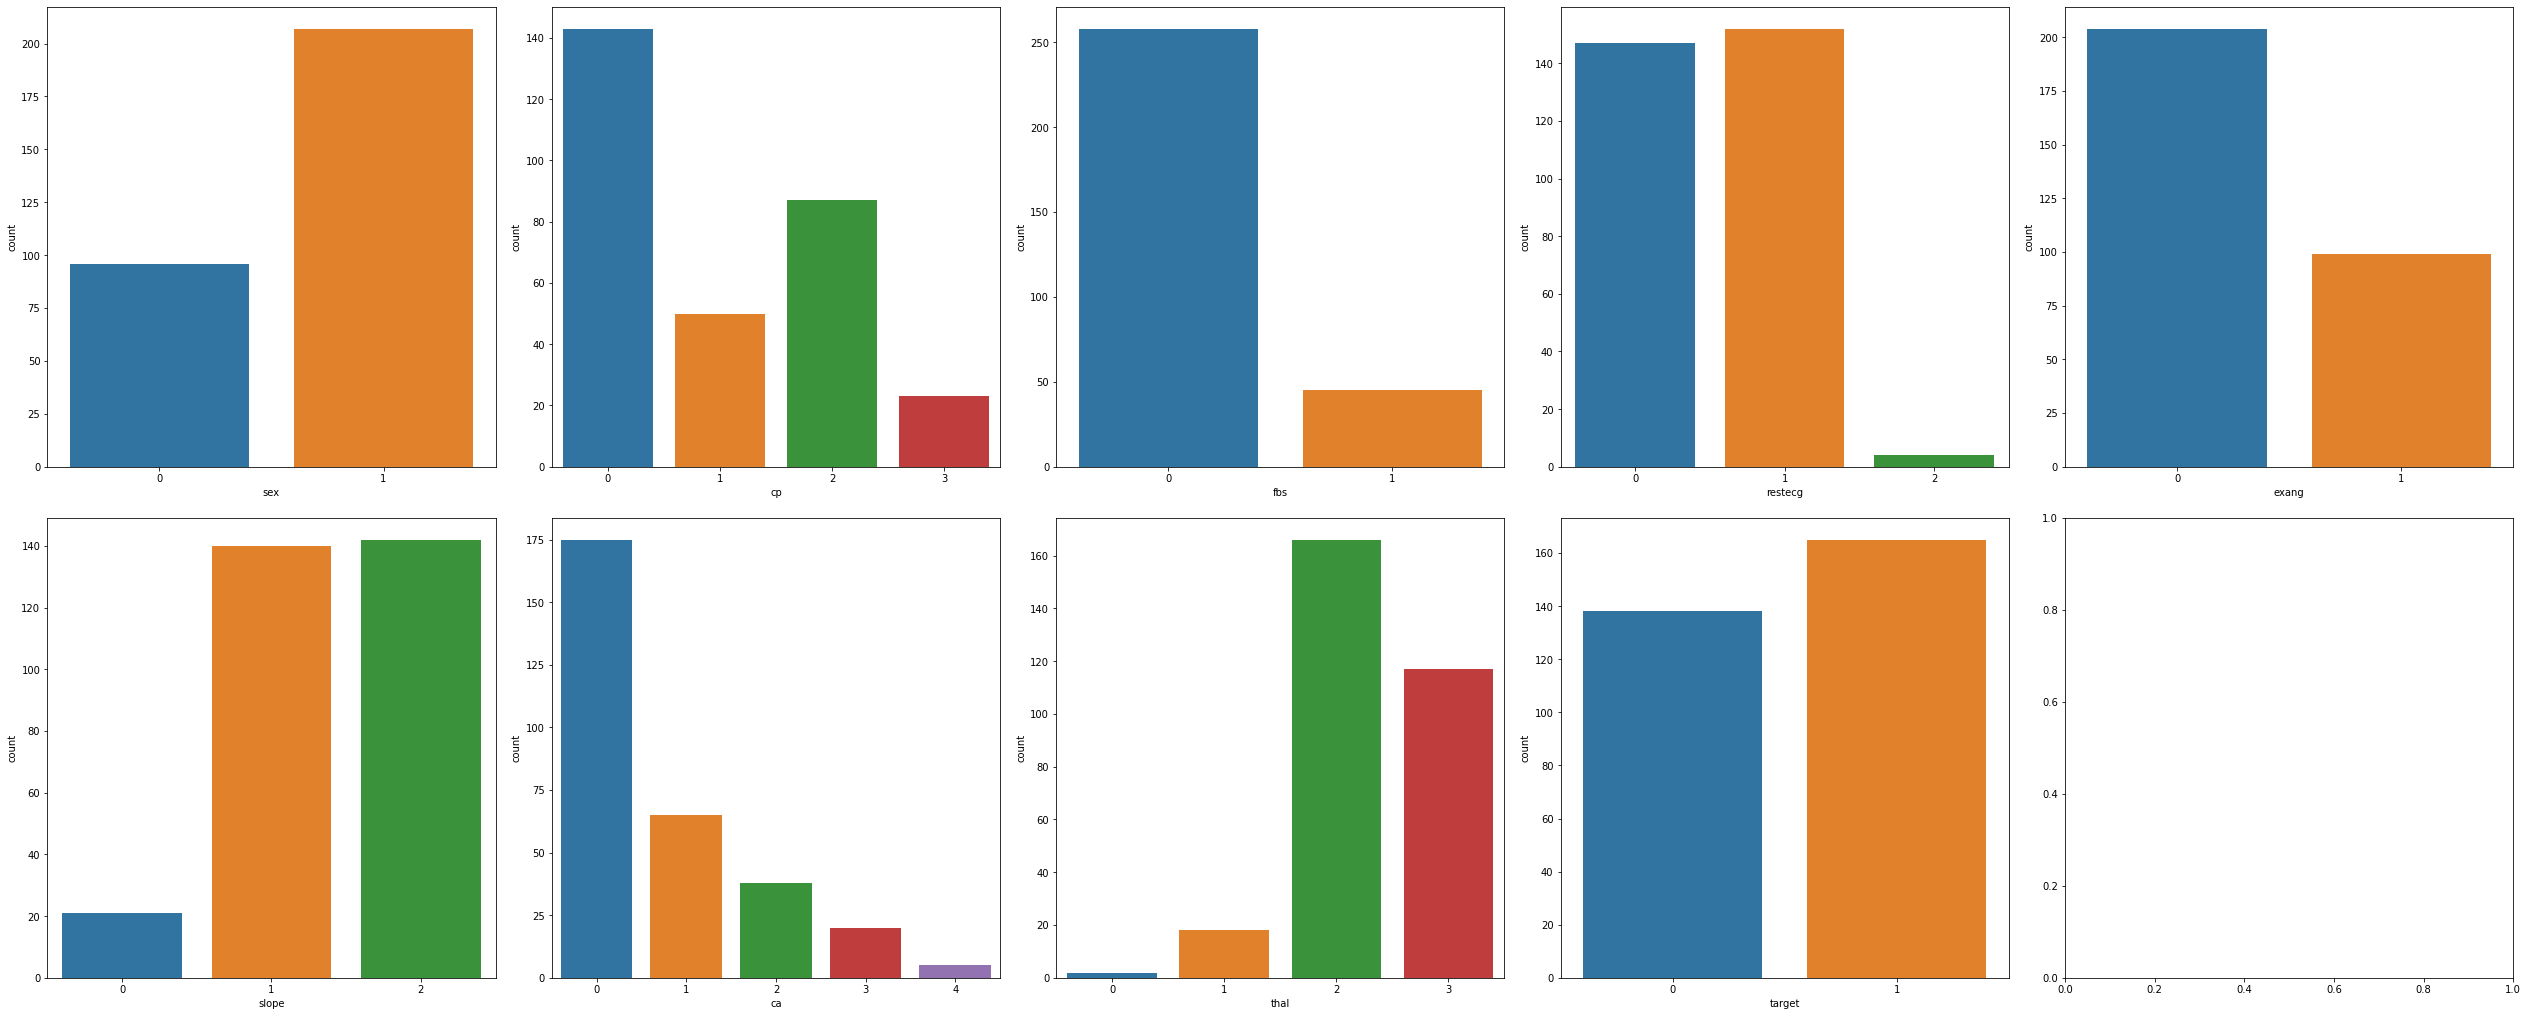

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(cat_val)
total_cols = 5
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i,var in enumerate(cat_val):
     row = i//total_cols
     pos = i % total_cols
     plot = sns.countplot(x=var, data=dataset, ax=axs[row][pos])

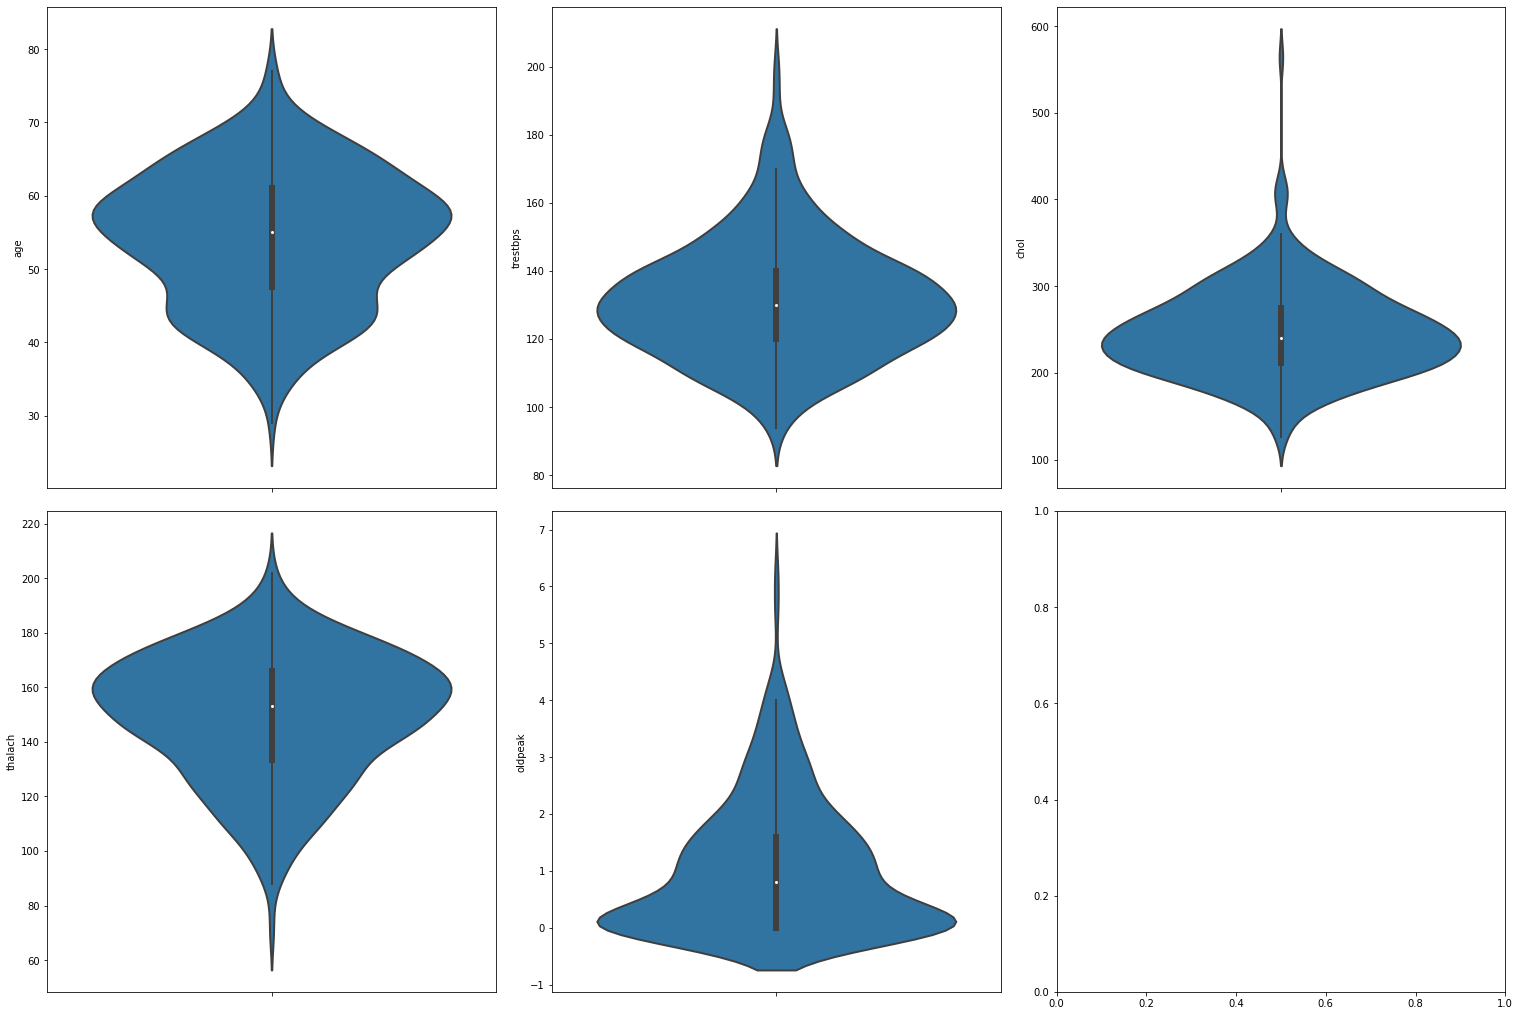

In [42]:
num_plots = len(cont_val)
total_cols = 3
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cont_val):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=dataset, ax=axs[row][pos], linewidth=2)

In [43]:
print("correlations among attributes - closer to +/- 1 are more likely to be related")
print()
correlation=dataset.corr()
correlation

correlations among attributes - closer to +/- 1 are more likely to be related



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


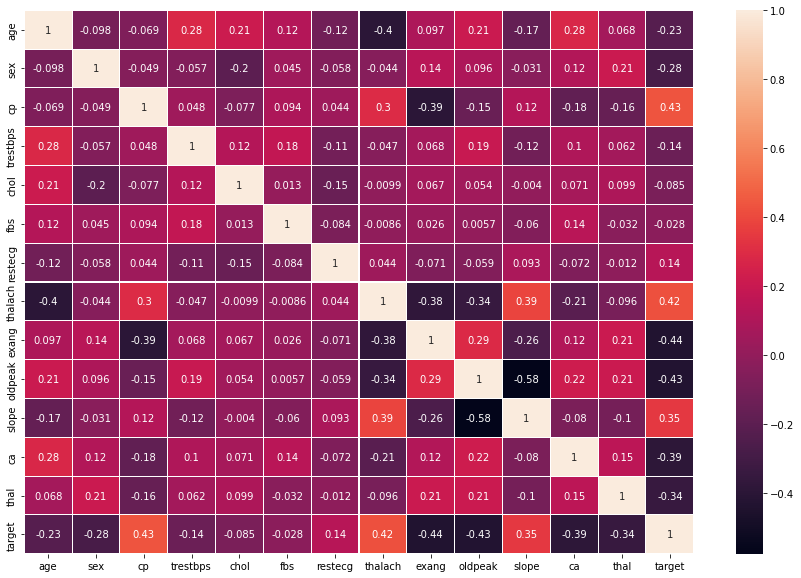

<Figure size 864x720 with 0 Axes>

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),linewidth=.01,annot=True)
plt.show()
plt.savefig('correlationfigure')

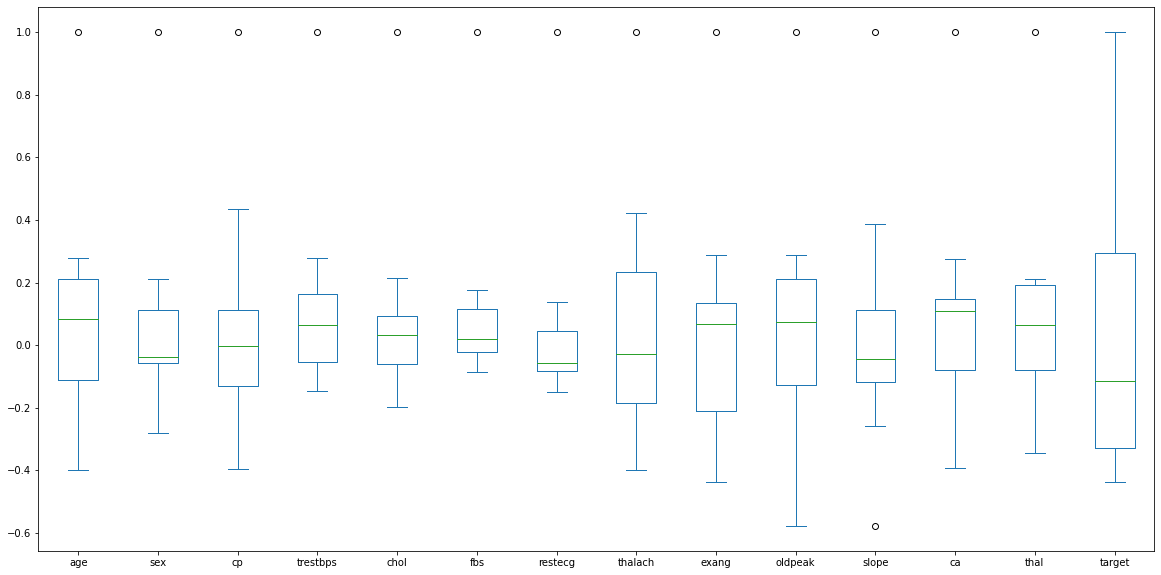

In [45]:
correlation.plot(kind="box",figsize=(20,10))

In [46]:
print("sorting the correlation among attributes corresponding with target- ")

pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)

sorting the correlation among attributes corresponding with target- 


,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ea0847d0>,
      dtype=object)

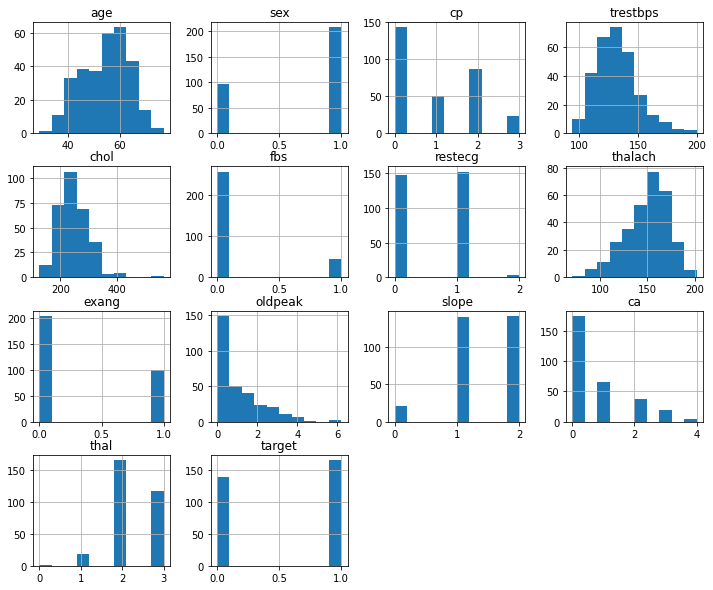

In [47]:
dataset.hist()

0 - absence of HD
1 - presence of HD
1    165
0    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Count of each Target Class')

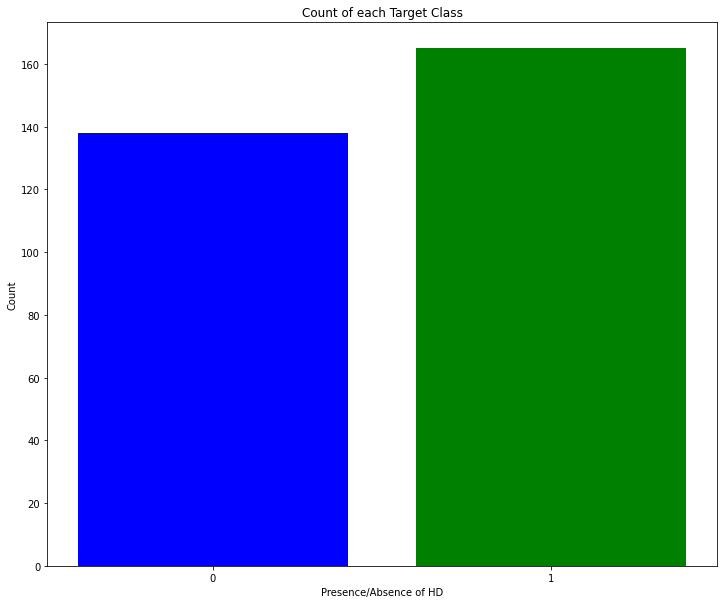

In [48]:
from matplotlib.pyplot import rcParams

print("0 - absence of HD")
print("1 - presence of HD")

print(dataset.target.value_counts())

# 0 - absence of HD
# 1 - presence of HD

rcParams['figure.figsize'] = 12,10
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['green', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Presence/Absence of HD')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [49]:
#Outlierr Analysis

from scipy import stats

z = np.abs(stats.zscore(dataset))
#print(z)
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 16 : 16
Rows: [ 28  48  85  92 158 163 164 204 220 221 223 246 248 251 272 281]
Columns: [ 4 12  4 11 11 11 11  9  4  9  3  4  3 11  7 12]


In [50]:
outliers_row = []
for j in res[0]:
    r = []
    for i in dataset.columns:
        r.append(dataset[i][j])
    outliers_row.append(r)
outliers_data = pd.DataFrame(data=outliers_row, columns = dataset.columns)
outliers_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
2,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
3,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
4,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [51]:
from sklearn.cluster import DBSCAN

X = dataset.drop(['target'], axis=1)

model = DBSCAN(eps=5.0, min_samples=4).fit(X)
labels=model.labels_
print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


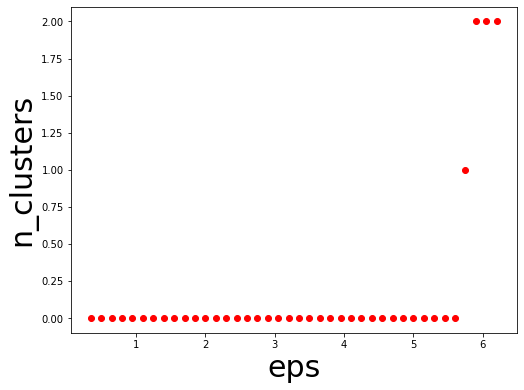

In [52]:
eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=3).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.show()

In [53]:
outliers = dataset[model.labels_ != -1]; print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
10    54    1   0       140   239    0        1      160      0      1.2   
49    53    0   0       138   234    0        0      160      0      0.0   
188   50    1   2       140   233    0        1      163      0      0.6   
201   60    1   0       125   258    0        0      141      1      2.8   
211   61    1   0       120   260    0        1      140      1      3.6   
277   57    1   1       124   261    0        1      141      0      0.3   

     slope  ca  thal  target  
10       2   0     2       1  
49       2   0     2       1  
188      1   1     3       0  
201      1   1     3       0  
211      1   1     3       0  
277      2   0     3       0  


In [54]:
#Feature_Selection
from sklearn.feature_selection import chi2

y = dataset['target']

print("The total features  :",X.shape)
print("The Feature Outcome :",y.shape)

print("Chi-Squared values for the data -",X.shape,y.shape)
chi_scores = chi2(X,y)
chi_scores

The total features  : (303, 13)
The Feature Outcome : (303,)
Chi-Squared values for the data - (303, 13) (303,)


(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

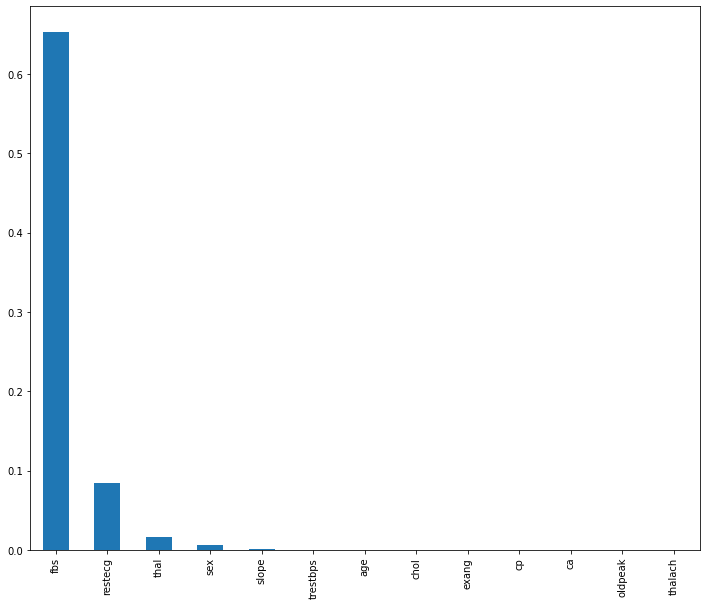

In [55]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [56]:
from sklearn.feature_selection import SelectKBest

best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

     Feature       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853


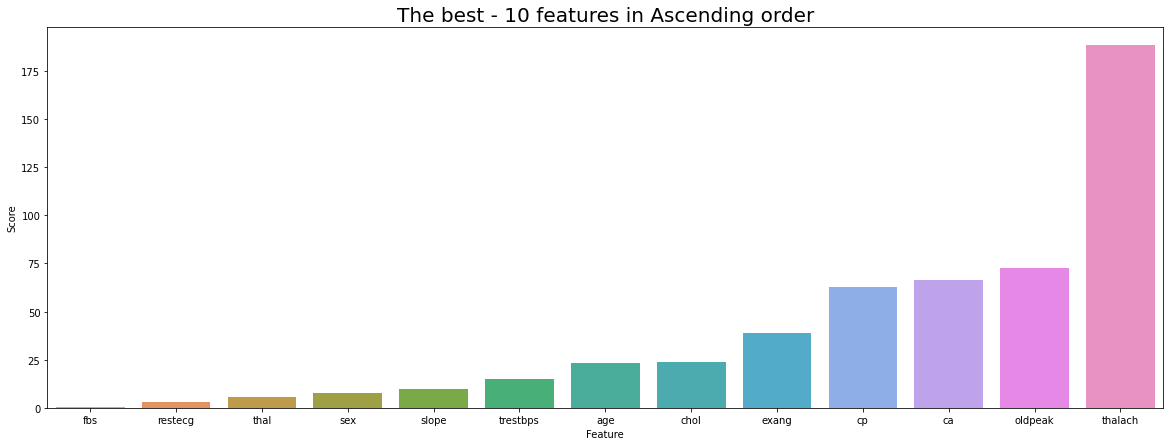

In [57]:
scores=scores.sort_values(by="Score", ascending=True)
best_features_chisquared=scores["Feature"].tolist()[:10]
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores)
plt.title("The best - 10 features in Ascending order", size=20)
plt.show()

In [58]:
best_features_chisquared

['fbs',
 'restecg',
 'thal',
 'sex',
 'slope',
 'trestbps',
 'age',
 'chol',
 'exang',
 'cp']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


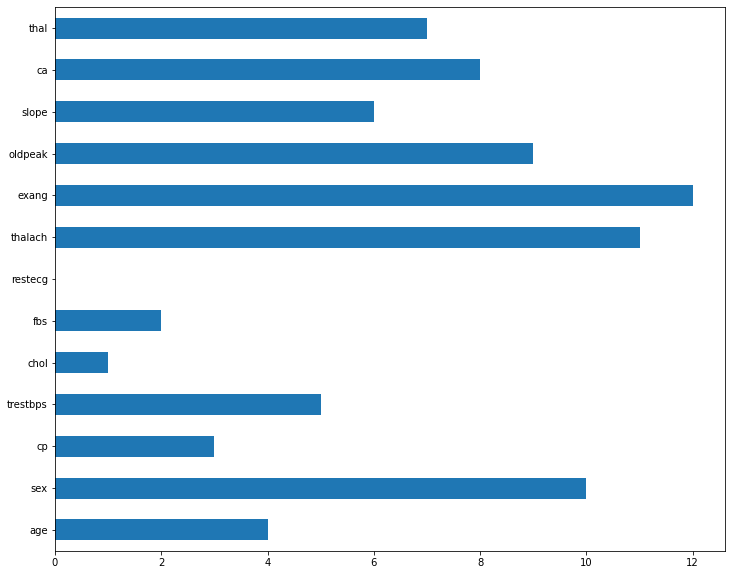

In [59]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

#dataset.reset_index(drop=True, inplace=True)

#X = X.astype(int)
#score = fisher_score.fisher_score(X,y)

idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank')

#plotting the ranked_features
f_ranks=pd.Series(idx,dataset.columns[0:len(dataset.columns)-1])
f_ranks.plot(kind='barh')
plt.show()

In [60]:
#k-mediods-scratch

import pandas as pd
import copy
from sklearn.metrics import silhouette_score

X = dataset.iloc[:,:-1].values

def pca(X,num_components):
  cov_mat = np.cov(X , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
  return X_reduced

# Reading, pre processing and applying PCA 
data_kmediods=dataset
normalized_data_kmediods=(data_kmediods-data_kmediods.mean())/data_kmediods.std()
normalized_data_kmediods=normalized_data_kmediods.fillna(normalized_data_kmediods.mean())
reduced_data=pca(normalized_data_kmediods,2)
reduced_data_kmediods=pd.DataFrame(reduced_data,columns=['x','y'])
reduced_data_kmediods=reduced_data_kmediods-reduced_data_kmediods.min()

#function to perform k-mediods on 'dataframe' with 'k' number of clusters
def k_mediods(dataframe,k):
  rows = dataframe.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = dataframe.shape[1] # 'cols' contains the total number of columns in cluster data.
  mediods = dataframe.loc[np.random.randint(1,rows+1,k)]
  mediods['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
  mediods.set_index('new',inplace = True)
  d = np.random.rand(rows)
  for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
    d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
  dataframe['cluster']=d
  
  no_of_iterations=30
  
  for it in range(no_of_iterations):
    fg=1
    while(fg==1):
      fg=0
      o_random=dataframe.loc[np.random.randint(1,rows+1)]
      for i in range(len(mediods)):
        o_mediod=[mediods.iloc[i,0],mediods.iloc[i,1]]  #select a random point
        cluster_no=dataframe[dataframe['x']==o_mediod[0]]
        cluster_no=list(dataframe[dataframe['y']==o_mediod[1]]['cluster'])
        
        prev_cost=0
        after_cost=0
        temp_df=dataframe[dataframe['cluster']==cluster_no[0]]
        for a in range(len(temp_df)):
          prev_cost=prev_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) #cost before swapping
        mediods.iloc[i,0],mediods.iloc[i,1]=o_random['x'],o_random['y']
        for a in range(len(temp_df)):
          after_cost= after_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) # cost after swapping
        if(after_cost>=prev_cost):
          mediods.iloc[i,0],mediods.iloc[i,1]=o_mediod[0],o_mediod[1] # if after cost >= prev cost, no need to swap
        else:
          fg=1
          break
    for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
      d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
    dataframe['cluster']=d
  return dataframe
  print(mediods)

test_df=k_mediods(copy.deepcopy(reduced_data_kmediods),2)
test_df.astype({'cluster':'int32'}).dtypes

x          float64
y          float64
cluster      int32
dtype: object

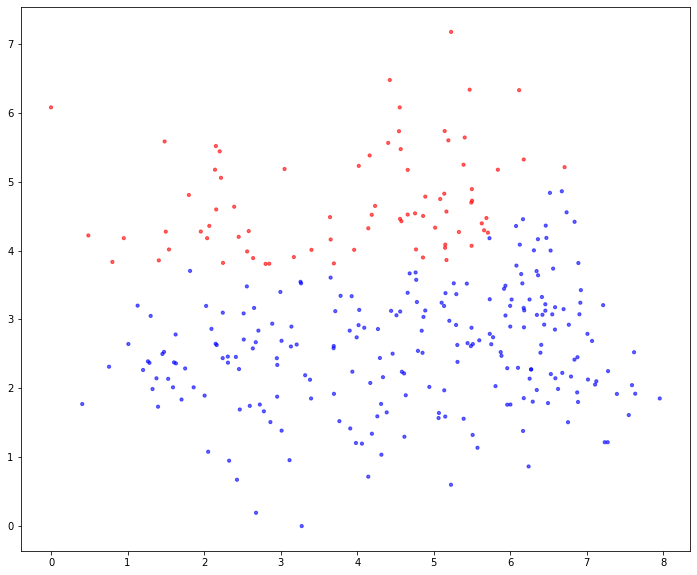

In [61]:
#plotting the clusters for K mediods
colors = ['red', 'blue']
test_df['c'] = test_df['cluster'].map({ 1:colors[0], 2:colors[1]})
plt.scatter(test_df.x,test_df.y ,c=test_df.c,  alpha = 0.6, s=10)

In [62]:
#from sklearn

!pip install scikit-learn-extra

from sklearn.svm import SVC
from sklearn_extra.cluster import KMedoids
import numpy as np

X = dataset.iloc[:,:-1].values

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
centroids = kmedoids.cluster_centers_
labels= kmedoids.labels_

y= kmedoids.predict(X)

print("Centroids are -",centroids)
print()
print("Labels are - ",labels)
print()

#set color
colors = ["g", "r"]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Centroids are - [[ 54.    1.    2.  125.  273.    0.    0.  152.    0.    0.5   0.    1.
    2. ]
 [ 52.    1.    0.  128.  204.    1.    1.  156.    1.    1.    1.    0.
    0. ]]

Labels are -  [1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 1]

coordinate: [ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1

In [65]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=65)

svc_model = SVC(kernel='linear', probability=True,random_state=32)
svc_model.fit(x_train,y_train)

y_pred_svm_general =svc_model.predict(x_test)

cm_svm_general = confusion_matrix(y_test, y_pred_svm_general)
print("Confusion Matrix -\n",cm_svm_general)

recall_svm_general = cm_svm_general[0][0]/(cm_svm_general[0][0] + cm_svm_general[0][1])
precision_svm_general = cm_svm_general[0][0]/(cm_svm_general[0][0]+cm_svm_general[1][1])
print("recall - ",recall_svm_general)
print("precision - ",precision_svm_general)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(svc_model, x_train, y_train, cv=10, scoring=scoring,return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

#acc_general = accuracy_score(y_test,y_pred_svm_general) - 1
acc_general = accuracy_score(y_test,y_pred_svm_general)
print("Acc - ",acc_general)

Fmeasure = f1_score(y_test, y_pred_svm_general,average='weighted')
print("F score - ",Fmeasure)

support_vectors = svc_model.support_vectors_

Confusion Matrix -
 [[51  0]
 [ 0 40]]
recall -  1.0
precision -  0.5604395604395604
Testing accuracy is:  0.9859307359307359
Acc -  1.0
F score -  1.0


In [66]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import pandas as pd

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

#plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

#SVM_Linear
grd1 = GridSearchCV(estimator = SVC(kernel='linear'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x_train,y_train)

best_parameters = grid1.best_params_
print("The best paramters are for Linear Kernel: \n",best_parameters)

best_model1 = SVC(kernel='linear', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model1, x_train, y_train, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm =best_model1.predict(x_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

The best paramters are for Linear Kernel: 
 {'C': 0.001, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9906926406926406
[[51  0]
 [ 0 40]]


(1.0, 0.5604395604395604)

In [67]:
#SVM_RBF

grd2 = GridSearchCV(estimator = SVC(kernel='rbf'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid2 = grd2.fit(x_train,y_train)

best_parameters = grid2.best_params_
print("The best paramters are for RBF Kernel: \n",best_parameters)

best_model2 = SVC(kernel='rbf', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model2, x_train, y_train, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm2 =best_model2.predict(x_test)

cm_svm2 = confusion_matrix(y_test, y_pred_svm2)
print(cm_svm2)

recall_svm2 = cm_svm2[0][0]/(cm_svm2[0][0] + cm_svm2[0][1])
precision_svm2 = cm_svm2[0][0]/(cm_svm2[0][0]+cm_svm2[1][1])
recall_svm2,precision_svm2

The best paramters are for RBF Kernel: 
 {'C': 100, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9813852813852815
[[51  0]
 [ 0 40]]


(1.0, 0.5604395604395604)

In [68]:
#SVM_POLY

grd3 = GridSearchCV(estimator = SVC(kernel='poly'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid3 = grd3.fit(x_train,y_train)

best_parameters = grid2.best_params_
print("The best paramters are for Polynomial Kernel: \n",best_parameters)


best_model3 = SVC(kernel='poly', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model3, x_train, y_train, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm3 =best_model3.predict(x_test)

cm_svm3 = confusion_matrix(y_test, y_pred_svm2)
print(cm_svm3)

svm_result3 = accuracy_score(y_test,y_pred_svm3)

recall_svm3 = cm_svm3[0][0]/(cm_svm3[0][0] + cm_svm3[0][1])
precision_svm3 = cm_svm3[0][0]/(cm_svm3[0][0]+cm_svm3[1][1])
recall_svm3,precision_svm3

The best paramters are for Polynomial Kernel: 
 {'C': 100, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.9904761904761905
[[51  0]
 [ 0 40]]


(1.0, 0.5604395604395604)